# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
#import keras
from tensorflow import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print(type(x_train), len(x_train), len(y_train), y_train[1])

<class 'numpy.ndarray'> 50000 50000 [9]


### 2. Visualize the First 24 Training Images

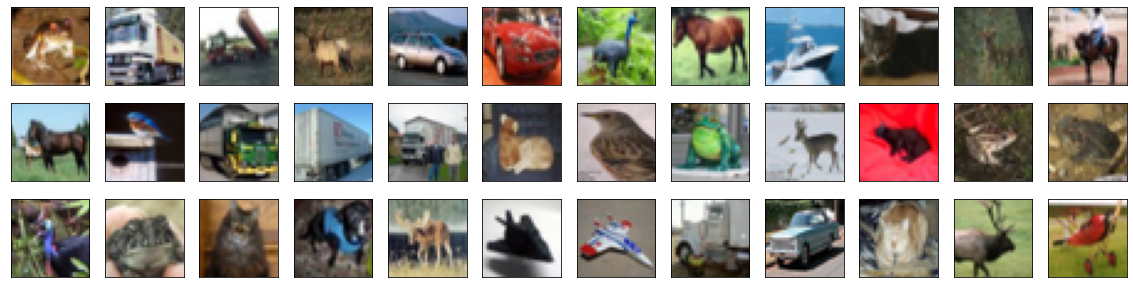

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

### 6. Compile the Model 

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/100
1407/1407 - 27s - loss: 1.5933 - accuracy: 0.4225 - val_loss: 1.5619 - val_accuracy: 0.4364

Epoch 00001: val_loss improved from inf to 1.56186, saving model to model.weights.best.hdf5
Epoch 2/100
1407/1407 - 7s - loss: 1.2680 - accuracy: 0.5503 - val_loss: 1.3780 - val_accuracy: 0.5226

Epoch 00002: val_loss improved from 1.56186 to 1.37797, saving model to model.weights.best.hdf5
Epoch 3/100
1407/1407 - 9s - loss: 1.1430 - accuracy: 0.5945 - val_loss: 1.0773 - val_accuracy: 0.6356

Epoch 00003: val_loss improved from 1.37797 to 1.07727, saving model to model.weights.best.hdf5
Epoch 4/100
1407/1407 - 9s - loss: 1.0794 - accuracy: 0.6241 - val_loss: 0.9911 - val_accuracy: 0.6598

Epoch 00004: val_loss improved from 1.07727 to 0.99108, saving model to model.weights.best.hdf5
Epoch 5/100
1407/1407 - 8s - loss: 1.0387 - accuracy: 0.6362 - val_loss: 1.0262 - val_accuracy: 0.6454

Epoch 00005: val_loss did not improve from 0.99108
Epoch 6/100
1407/1407 - 6s - loss: 1.0181 - accu


Epoch 00052: val_loss did not improve from 0.96034
Epoch 53/100
1407/1407 - 5s - loss: 1.6433 - accuracy: 0.4402 - val_loss: 1.7463 - val_accuracy: 0.4482

Epoch 00053: val_loss did not improve from 0.96034
Epoch 54/100
1407/1407 - 6s - loss: 1.6531 - accuracy: 0.4367 - val_loss: 2.5591 - val_accuracy: 0.3666

Epoch 00054: val_loss did not improve from 0.96034
Epoch 55/100
1407/1407 - 8s - loss: 1.6362 - accuracy: 0.4414 - val_loss: 1.5146 - val_accuracy: 0.5042

Epoch 00055: val_loss did not improve from 0.96034
Epoch 56/100
1407/1407 - 7s - loss: 1.6498 - accuracy: 0.4328 - val_loss: 1.4756 - val_accuracy: 0.4646

Epoch 00056: val_loss did not improve from 0.96034
Epoch 57/100
1407/1407 - 6s - loss: 1.6562 - accuracy: 0.4380 - val_loss: 1.3383 - val_accuracy: 0.5396

Epoch 00057: val_loss did not improve from 0.96034
Epoch 58/100
1407/1407 - 8s - loss: 1.6562 - accuracy: 0.4350 - val_loss: 1.5487 - val_accuracy: 0.4844

Epoch 00058: val_loss did not improve from 0.96034
Epoch 59/100

### 8. Load the Model with the Best Validation Accuracy

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [12]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6732000112533569


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [13]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

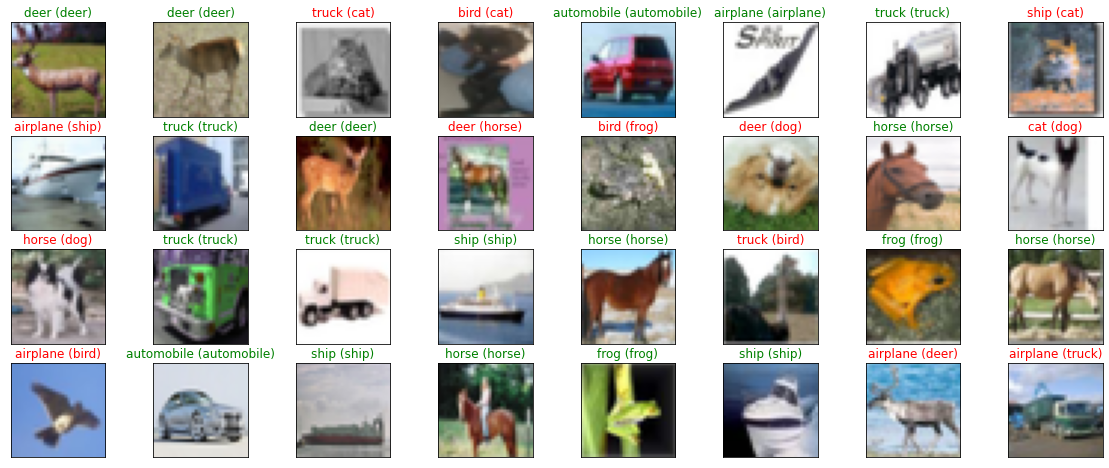

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))